# Coursework A: Curve Fitting

In this exercise, some of the challenges of developing machine learning algorithms using 'pure' Python are explored using nothing more than the NumPy library.

## Function Definition and Testing

In [203]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=150


# Function definitions
# Define function to calculate values of polynomial
def polyModel(x, theta):
    """
    Calculates the polynomial output y(x) = Σ (θ_i * x^i).

    Args:
        x (np.ndarray): NumPy array of x values
        theta (np.ndarray): NumPy array of polynomial coefficients
        
    Returns:
        np.ndarray: NumPy array of y values
    """
    # Calculate θ_i * x^i for all coefficients in theta by looping over the range of theta
    # Sum all the terms to get the value of the polynomial
    return np.sum([theta[i] * x**i for i in range(len(theta))], axis=0)

# Define function to calculate values of polynomial with added noise
def polyModelWithNoise(x, theta, sigma):
    """
    Calculates the polynomial output y(x) = Σ (θ_i * x^i) + σ.
    
    Args:
        x (np.ndarray): NumPy array of x values
        theta (np.ndarray): NumPy array of polynomial coefficients
        sigma (float): standard deviation of noise distribution
    """
    # Add noise to the polyModel output using np.random.normal
    return polyModel(x, theta) + np.random.normal(0, sigma, x.shape)

In [204]:
# Data initialisation for test functions
# Generate 100 evenly spaced x values between 0 and 1
xValues = np.linspace(0, 1, 100)

# Define theta array [1, 3]
theta = np.array([1, 3])

# Calculate polynomial values for given xValues and theta both without and with noise
yPoly = polyModel(xValues, theta)
yPolyWithNoise = polyModelWithNoise(xValues, theta, sigma=0.5)

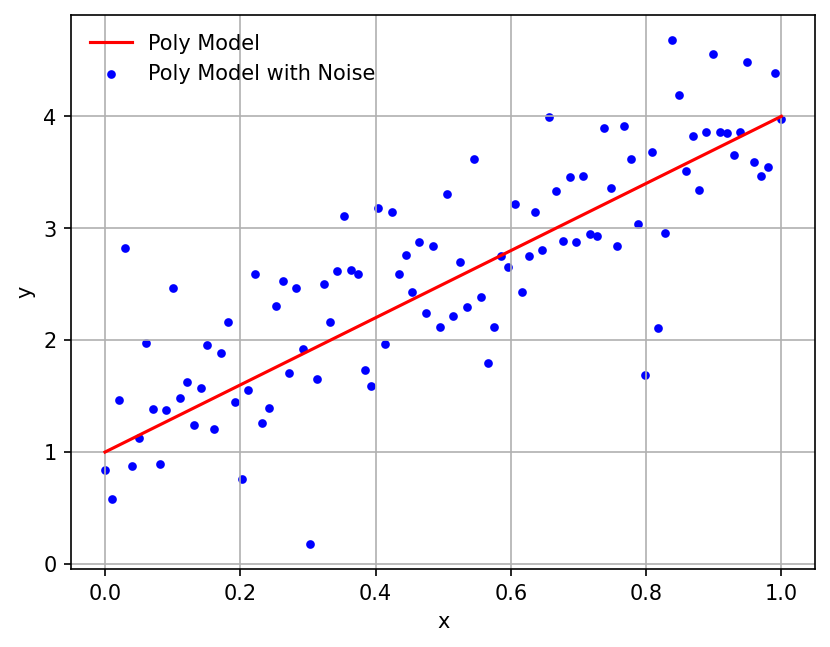

In [205]:
# Plot outputs from polyModel and polyModelWithNoise
fig, ax = plt.subplots()
ax.plot(xValues, yPoly, label="Poly Model", color="red") # Plot the polynomial values without noise as a line
ax.scatter(xValues, yPolyWithNoise, label="Poly Model with Noise", color="blue", s=10) # Plot the polynomial values with noise as points
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid(True)


## Gradient Descent

In [206]:
# Define function to return gradient of polynomial function wrt parameter theta
def polyGradient(x, theta):
    """
    Calculates the gradient of the polynomial wrt theta.
    
    Args:
        x (np.ndarray): NumPy array of x values
        theta (np.ndarray): NumPy array of polynomial coefficients
        
    Returns:
        np.ndarray: 2D NumPy array where each row corresponds to ∂y/∂θ_i
    """
    # Calculate the matrix of gradients
    return np.array([x**i for i in range(len(theta))]) # NumPy broadcasting used to find x**i across all elements of x

In [207]:
# Define stochastic gradient descent function
def stochasticGradientDescent(xValues, yValues, thetaInit, learningRate, numIterations, sampleSize):
    """
    Performs stochastic gradient descent to find the optimal theta values for a polynomial model.

    Args:
        xValues (np.ndarray): NumPy array of x values
        yValues (np.ndarray): NumPy array of y values
        thetaInit (np.ndarray): NumPy array of initial theta values
        learningRate (float): learning rate for the update
        numIterations (int): number of iterations to perform
        sampleSize (int): number of samples to use in each iteration
    
    Returns:
        tuple: NumPy array of final theta values, list of mean squared error values
    """
    
    theta = thetaInit # Set initial theta values
    mseValues = [] # Create an empty list to store the mean squared error values
    
    for _ in range(numIterations):
        # Randomly sample data without replacement
        indices = np.random.choice(len(xValues), sampleSize, replace=False)
        xSample = xValues[indices]
        ySample = yValues[indices]
        
        # Calculate model predictions and error
        yModel = polyModel(xSample, theta)
        error = yModel - ySample
        
        # Calculate mean squared error for this sample
        mseValues.append(np.mean(error**2))
        
        # Update theta using the learning rate and gradient
        theta -= (1 / sampleSize) * learningRate * np.dot(polyGradient(xSample, theta), error)
    
    return theta, mseValues

# Initilise parameters for stochastic gradient descent
thetaInit = np.array([-1, 0.5])
learningRate = 0.5
numIterations = 100
sampleSize = 10

thetaTrue = np.array([1, 3])
sigmaTrue = 0.5

# Generate training data
xValues = np.random.uniform(0, 1, 100) # Generate 100 random values between 0 and 1 to give a larger spread that we can sample 10 values from
yValues = polyModelWithNoise(xValues, thetaTrue, sigmaTrue) # Generate y data values using the true theta and sigma values

# Perform stochastic gradient descent
thetaFinal, mseValues = stochasticGradientDescent(xValues, yValues, thetaInit, learningRate, numIterations, sampleSize)
#print("Final theta values: ", thetaFinal)

Final theta values:  [1.1501997  2.89127049]


## Results Plotting and Higher Order Polynomials

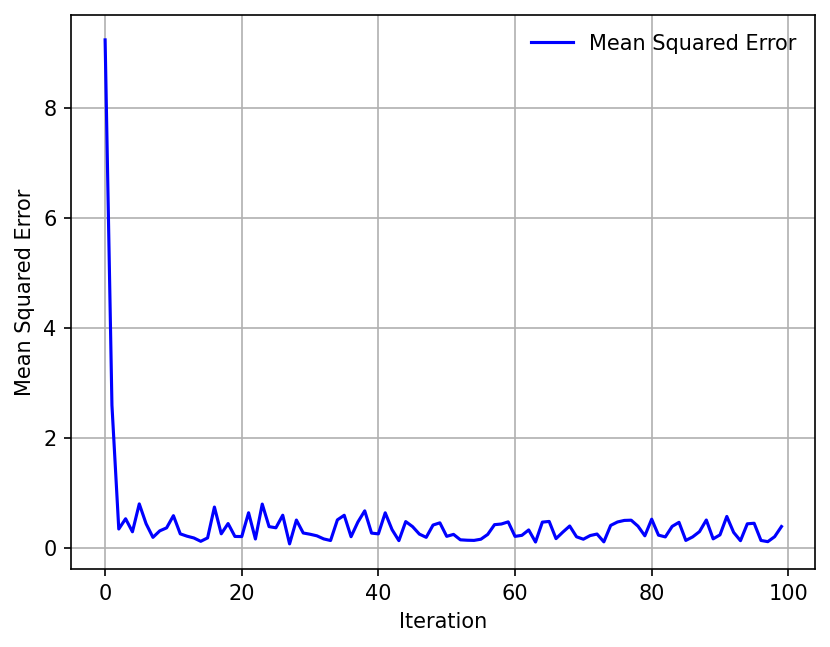

In [208]:
# Plot the results of the stochastic gradient descent algorithm
fig, ax = plt.subplots()
ax.plot(mseValues, label="Mean Squared Error", color="blue") # Plot the mean squared error values
ax.set_xlabel("Iteration")
ax.set_ylabel("Mean Squared Error")
ax.legend()
ax.grid(True)

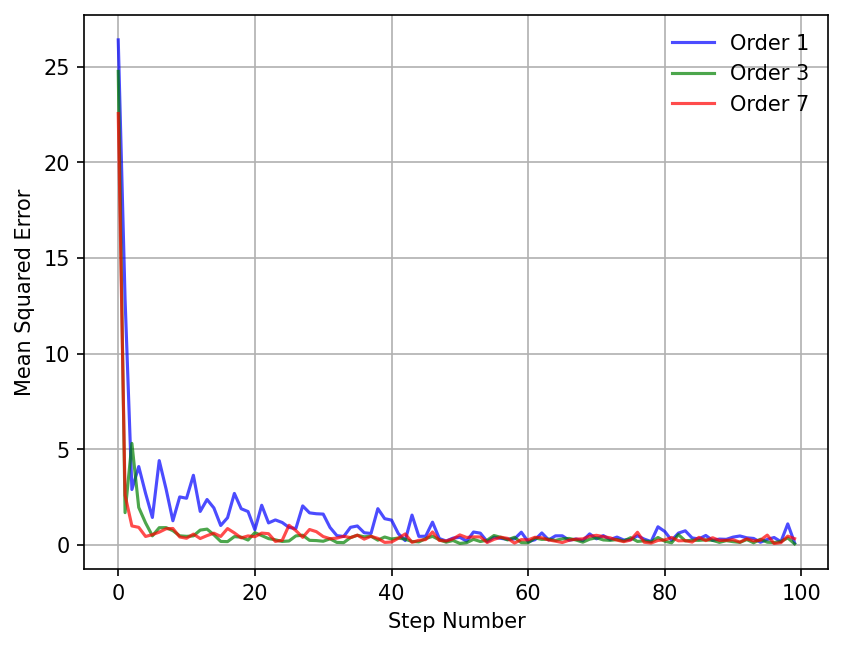

In [209]:
# Initialise parameters for 3rd order polynomial
thetaTrue = np.array([1, 4, 3, 2])
sigmaTrue = 0.5

# Generate training data
xValues3rd = np.random.uniform(0, 1, 100) # Generate 100 random values, again for a larger spread
yValues3rd = polyModelWithNoise(xValues3rd, thetaTrue, sigmaTrue) # Generate y data values using the true theta and sigma values

# Polynomial orders to test
orders = [1, 3, 7]

# Create empty dictionaries to store mean squared error values and theta values
# Dictionaries used to store each value with its corresponding order
mseValues = {}
thetaValues = {}

# Fit models of different orders
for order in orders:
    # Starting point for fit is array of zeroes of appropriate length for given order
    thetaInit = np.zeros(order + 1)
    
    # Perform stochastic gradient descent
    thetaFinal, mse = stochasticGradientDescent(xValues3rd, yValues3rd, thetaInit, learningRate, numIterations, sampleSize)
    
    # Store the final theta values and mean squared error values in dictionaries
    thetaValues[order] = thetaFinal
    mseValues[order] = mse

# Plot the results of the stochastic gradient descent algorithm for different polynomial orders
fig, ax = plt.subplots()
# Plot the mean squared error values for each order
ax.plot(mseValues[1], label="Order 1", alpha=0.7, color="blue")
ax.plot(mseValues[3], label="Order 3", alpha=0.7, color="green")
ax.plot(mseValues[7], label="Order 7", alpha=0.7, color="red")
ax.set_xlabel("Step Number")
ax.set_ylabel("Mean Squared Error")
ax.legend()
ax.grid(True)

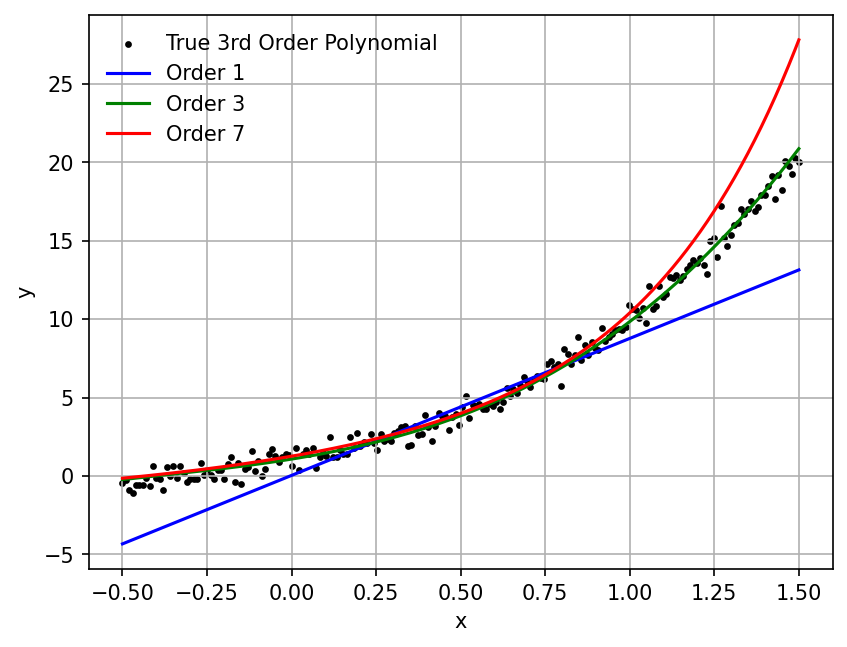

In [210]:
# Plot models over expanded range of x values
xExpanded = np.linspace(-0.5, 1.5, 200)
yExpanded = polyModelWithNoise(xExpanded, thetaTrue, sigmaTrue)

fig, ax = plt.subplots()
ax.scatter(xExpanded, yExpanded, label="True 3rd Order Polynomial", s=5, color="black")
# Plot the model for each order
ax.plot(xExpanded, polyModel(xExpanded, thetaValues[1]), label="Order 1", color="blue")
ax.plot(xExpanded, polyModel(xExpanded, thetaValues[3]), label="Order 3", color="green")
ax.plot(xExpanded, polyModel(xExpanded, thetaValues[7]), label="Order 7", color="red")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid(True)

### Comments on how well the model will generalise to unfamiliar regions of x

* First order model will not generalise well, as it underfits the data significantly. This is because its linear nature can't accurately approximate the curvature of the 3rd order polynomial.
* Third order model will generalise well to ranges slightly outside the training range, as within the training range (x from 0 to 1) it fits the data well - it will become less accurate with larger ranges however.
* Seventh order model will not generalise well, as it overfits the data. Although it fits the data well within the training range, as it is too high of an order it starts to capture the noise rather than the data itself, which can lead to much greater deviations outside the training range.